In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [176]:
import statsmodels.api as sm

In [177]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, Lars
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [178]:
import warnings
warnings.filterwarnings("ignore")

In [179]:
automobile_df = pd.read_csv('automobile_df_processed.csv')
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,27.2,4,119.0,97.0,2300,14.7,44
1,13.0,8,350.0,145.0,3988,13.0,49
2,32.4,4,107.0,72.0,2290,17.0,42
3,15.0,8,350.0,145.0,4082,13.0,49
4,13.0,8,360.0,175.0,3821,11.0,49


In [180]:
result_dict = {}

In [181]:
def build_model(regression_fn, col_y_name, col_x_names, dataset, test_frac=.2, preprocess_fn=None, show_plot_y=False, show_scatter=False):
    X = dataset[col_x_names]
    y = dataset[col_y_name]

    if preprocess_fn:
        X = preprocess_fn(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_frac)

    model = regression_fn(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Trining score:", model.score(X_train, y_train))
    print("Testing score:", r2_score(y_test, y_pred))

    if show_plot_y:
        plt.plot(y_test.values, label='Actual')
        plt.plot(y_pred, label='Predicted')
        plt.legend(['Predict', 'Actual'])
        plt.show()
        
    return {
        'train_score': model.score(X_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }


In [182]:
def compare_results(results): 
    for key in results:
        print('Regression Model:', key)
        print('Training Score:', results[key]['train_score'])
        print('Testing Score:', results[key]['test_score'])
        print()        

In [183]:
def linear_regression(X, y):
    return LinearRegression(normalize=True).fit(X, y)

Trining score: 0.6996100517142314
Testing score: 0.6559584087588333


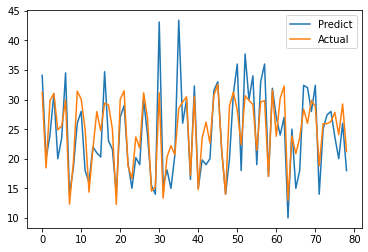

In [184]:
result_dict['mpg - single linear'] = build_model(
    linear_regression, 'mpg', ['weight'], automobile_df, show_plot_y=True)


Trining score: 0.6946843448581809
Testing score: 0.7617577216720224


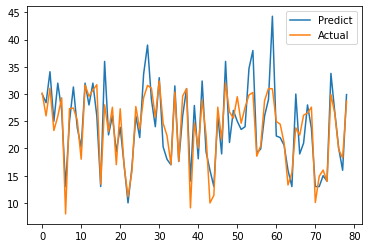

In [185]:
result_dict['mpg - kitchen sink linear'] = build_model(linear_regression, 'mpg', [
                                                       'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'], automobile_df, show_plot_y=True)


Trining score: 0.7172404125219611
Testing score: 0.6649979470691525


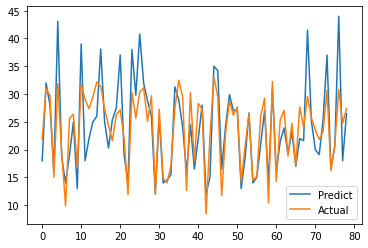

In [186]:
result_dict['mpg - parsimonius linear'] = build_model(
    linear_regression, 'mpg', ['weight', 'horsepower'], automobile_df, show_plot_y=True)


In [187]:
compare_results(result_dict)

Regression Model: mpg - single linear
Training Score: 0.6996100517142314
Testing Score: 0.6559584087588333

Regression Model: mpg - kitchen sink linear
Training Score: 0.6946843448581809
Testing Score: 0.7617577216720224

Regression Model: mpg - parsimonius linear
Training Score: 0.7172404125219611
Testing Score: 0.6649979470691525



In [188]:
def lasso_regression(X, y, alpha=.5):
    return Lasso(alpha=alpha).fit(X, y)

Trining score: 0.7123717220218401
Testing score: 0.6823222292312991


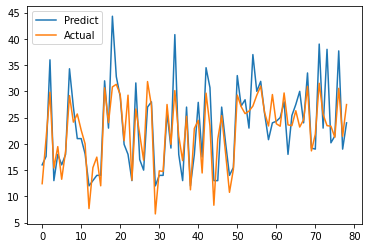

In [189]:
result_dict['mpg - kitchen sink lasso'] = build_model(lasso_regression, 'mpg', [
                                                       'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'], automobile_df, show_plot_y=True)

In [190]:
def ridge_regression(X, y, alpha=.5, normalize=True):
    return Ridge(alpha=alpha, normalize=normalize).fit(X, y)

Trining score: 0.6677495122031232
Testing score: 0.7373479054650568


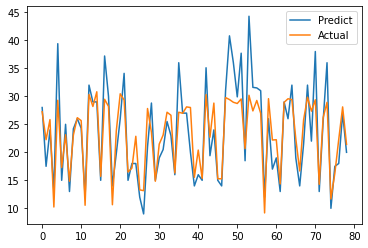

In [191]:
result_dict['mpg - kitchen sink lasso'] = build_model(ridge_regression, 'mpg', [
                                                       'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'], automobile_df, show_plot_y=True)

In [192]:
def elastic_net_regression(X, y, alpha=1, l1_ratio=.5, normalize=False,
                           max_iter=100000, warm_start=True, 
                           equivalent_to='Elastic Net'):
    print('Equivalent To:', equivalent_to)
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize, max_iter=max_iter, warm_start=warm_start).fit(X, y)


In [193]:
from functools import partial

Equivalent To: OLS
Trining score: 0.6960468728353304
Testing score: 0.7578666324762746


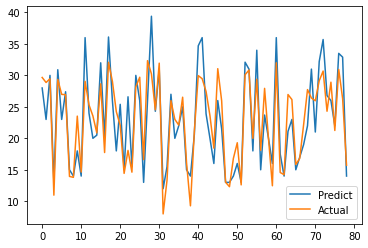

In [194]:
result_dict['mpg - kitchen sink elastic net ols'] = build_model(partial(elastic_net_regression, alpha=0, equivalent_to='OLS'), 'mpg', [
    'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'], automobile_df, show_plot_y=True)


Equivalent To: Lasso
Trining score: 0.7061362593040825
Testing score: 0.7097473822954344


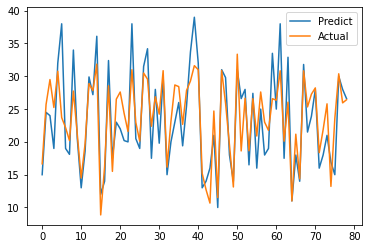

In [195]:
result_dict['mpg - kitchen sink elastic net lasso'] = build_model(
    partial(elastic_net_regression, alpha=1,
            l1_ratio=1, equivalent_to='Lasso'),
    'mpg',
    ['weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'],
    automobile_df, show_plot_y=True)


Equivalent To: Lasso
Trining score: 0.7040526215529664
Testing score: 0.7119942790808096


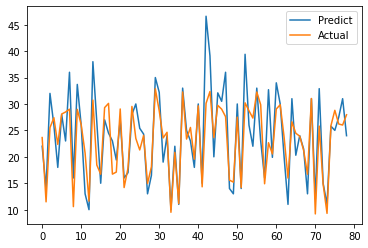

In [196]:
result_dict['mpg - kitchen sink elastic net lasso'] = build_model(
    partial(elastic_net_regression, alpha=1,
            l1_ratio=0, equivalent_to='Lasso'),
    'mpg',
    ['weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'],
    automobile_df, show_plot_y=True)


Equivalent To: Lasso
Trining score: 0.7023879509335793
Testing score: 0.7253270809044274


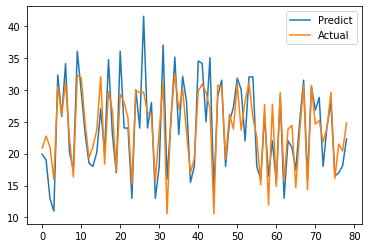

In [197]:
result_dict['mpg - kitchen sink elastic net lasso'] = build_model(
    partial(elastic_net_regression, alpha=1,
            l1_ratio=0.5, equivalent_to='Lasso'),
    'mpg',
    ['weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'],
    automobile_df, show_plot_y=True)


In [198]:
def svr_regression(X, y, kernel='linear', C=.3, epsilon=.05):
    return SVR(kernel=kernel, C=C, epsilon=epsilon).fit(X, y)

Trining score: 0.7085086317087818
Testing score: 0.6749349580343723


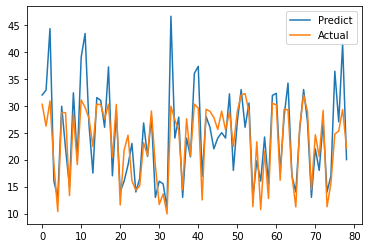

In [199]:
result_dict['mpg - kitchen sink svr'] = build_model(svr_regression, 'mpg', [
                                                    'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'],
                                                    automobile_df, show_plot_y=True)


In [200]:
def knn_regression(X, y, n_neighbors=10):
    return KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)

Trining score: 0.7668112724757544
Testing score: 0.6809033118669454


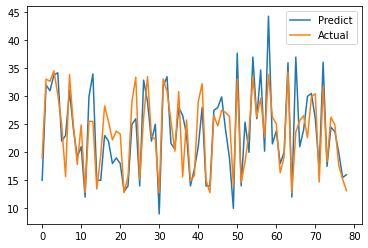

In [201]:
result_dict['mpg - kitchen sink knn'] = build_model(knn_regression, 'mpg', [
    'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'
], automobile_df, show_plot_y=True)


In [202]:
def apply_standard_scaler(X):
    return StandardScaler().fit_transform(X)

In [207]:
def sgd_regression(X, y, max_iter=1000, tol=1e-3,):
    return SGDRegressor(max_iter=max_iter, tol=tol).fit(X, y)

Trining score: 0.710870085219182
Testing score: 0.6587599718653883


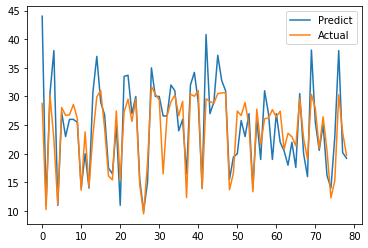

In [210]:
result_dict['mpg - kitchen sink sgd'] = build_model(sgd_regression, 'mpg', [
    'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration',
], automobile_df, show_plot_y=True, preprocess_fn=apply_standard_scaler)


In [211]:
def desicion_tree_regression(X, y, max_depth=2):
    return DecisionTreeRegressor(max_depth=max_depth).fit(X, y)

Trining score: 0.7218521517869959
Testing score: 0.7742953447181713


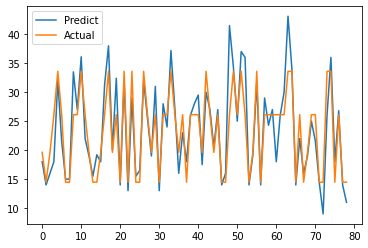

In [212]:
result_dict['mpg - kitchen sink decision tree'] = build_model(desicion_tree_regression, 'mpg', [
    'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration',
], automobile_df, show_plot_y=True)

In [213]:
def lars_regression(X, y, n_nonzero_coefs=4):
    return Lars(n_nonzero_coefs=n_nonzero_coefs).fit(X, y)

Trining score: 0.7339105305367675
Testing score: 0.6135385233758806


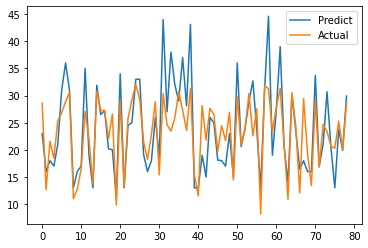

In [214]:
result_dict['mpg - kitchen sink lars'] = build_model(lars_regression, 'mpg', [
    'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration',
], automobile_df, show_plot_y=True)